0.0
0.0
0.0
0.0
0.5
(274, 250, 22, 20)
sadas
sadsadasdasdas
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3286.5
0.0
0.0
0.0
0.0


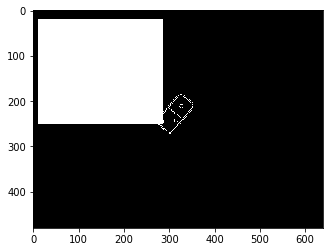

In [18]:
#MODUL VISIO
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

threshold = 0.5
lowerThreshold = 0.33
upperThreshold = 0.99


def comptarPunts(area):
    pass


def detectarPunts(src,origen):
    
    punts = src.copy()
    #Passem la imatge a blanc i negre (255 | 0)
    mitjana = np.mean(src)
    dst[src-mitjana<=src*threshold]=0
    dst[src!=0]=255
    #plt.imshow(dst,'gray')
    

    
    punts = cv.Canny(punts,0,6)
    contorns,jerarquia = cv.findContours(punts,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
    
    
    punts = cv.cvtColor(punts,cv.COLOR_GRAY2BGR)
    
    for i,c in enumerate(contorns):        
        #Obtenim el area de la fitxa
        areaFitxa = cv.contourArea(contorns[i])
        print(areaFitxa)
        if areaFitxa > lowerThreshold and areaFitxa < upperThreshold:
            #areaRectangle[x,y,width,height]
                    
            areaRectangle = cv.boundingRect(c)
            print(areaRectangle)
            #part1=None
            #part2=None
            nombreDePunts=0
            areaROI = None
            
            part1 = np.zeros(punts.shape,dtype='uint8')
            part2 = np.zeros(punts.shape,dtype='uint8')
            color = (255,255,255)
            thickness = -1
            
            if(areaRectangle[2] > areaRectangle[3]):
                #part 1
                start_point = (areaRectangle[0],areaRectangle[1])
                end_point = (int(areaRectangle[2]/2),areaRectangle[3])
                part1 = cv.rectangle(part1, start_point, end_point, color, thickness)
                #part 2
                start_point = (areaRectangle[0]+int(areaRectangle[2]/2),areaRectangle[1])
                end_point = (int(areaRectangle[2]/2),areaRectangle[3])
                part2 = cv.rectangle(part1, start_point, end_point, color, thickness)             
            else:
                #part 1
                start_point = (areaRectangle[0],areaRectangle[1])
                end_point = (int(areaRectangle[2]/2),areaRectangle[3])
                part1 = cv.rectangle(part1, start_point, end_point, color, thickness)
                #part 2
                start_point = (areaRectangle[0],areaRectangle[1]+int(areaRectangle[3]/2))
                end_point = (areaRectangle[2],areaRectangle[3])
                part2 = cv.rectangle(part1, start_point, end_point, color, thickness)                             
            
            #src(areaROI)
            
            temp = punts.copy()
            temp+= part1
            temp[temp!=0]=255
            
            print('sadas')
            plt.figure(1)
            plt.imshow(temp,'gray')
            print('sadsadasdasdas')
            #nombreDePunts = comptarPunts(part1)
            
    
    
    #plt.figure(1)
    #plt.imshow(part1)
    
    #print('contorns:',contorns)
    #print('jerarquia',jerarquia)
    #plt.figure(2)
    #plt.imshow(punts,'gray')
    

    
    
if __name__ == '__main__':
    frame = cv.imread('src/test1fitxa.png')
    dst = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    dst = cv.GaussianBlur(dst, (1, 1), 0) 
    detectarPunts(dst,frame)


    



In [ ]:
# Standard imports
import cv2
import numpy as np;

# Read image
im = cv2.imread("src/test1fitxa.png", cv2.IMREAD_GRAYSCALE)

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector()

# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show keypoints
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)